In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split as TSE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


C:\Users\Prashant Dodiya\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# feeding the data
ads_data = pd.read_csv("Social_Network_Ads.csv")
ads_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# changing values under Gender column to binary: M-->0 & F-->1
ads_data['Gender'] = ads_data['Gender'].map({'Female':1, 'Male':0})
ads_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [4]:
#checking for null values
ads_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:xlabel='Age'>

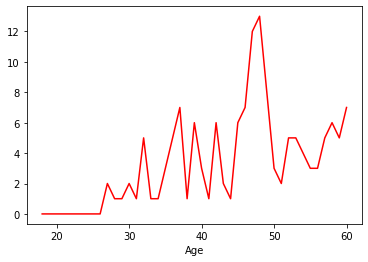

In [5]:
# visualising the dependency of age
ads_data['Purchased'].groupby(ads_data['Age']).sum().plot(color='red')
# clearly seen that age is good factor

<AxesSubplot:xlabel='EstimatedSalary'>

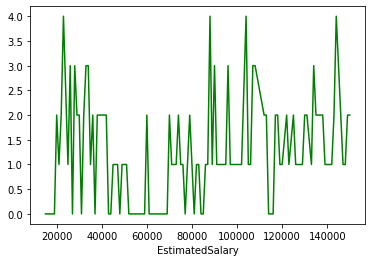

In [6]:
# visualising the dependency of salary
ads_data['Purchased'].groupby(ads_data['EstimatedSalary']).sum().plot(color='green')

#from the plot it is clear that it doesnot depend on the salary

<AxesSubplot:xlabel='Gender'>

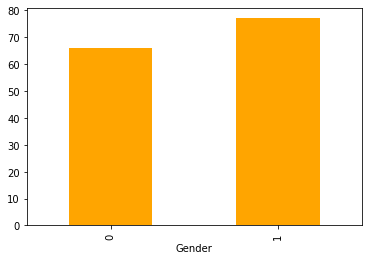

In [7]:
# visualising the dependency of gender
ads_data['Purchased'].groupby(ads_data['Gender']).sum().plot.bar(color='orange')

# neither gender is such a significant parameter

In [8]:
# user id column not needed
ads_data.drop(columns=['User ID'])

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [9]:
#considering most significant params
x = ads_data[['Age','Gender']]
y = ads_data['Purchased']

In [10]:
#splitting the data into train and test
x_train, x_test, y_train, y_test = TSE(x,y, test_size= 0.2)

In [11]:
# fitting into model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\Prashant Dodiya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
#making array of predicted value
y_predict = logreg.predict(x_test)

In [13]:
#creating confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)

Text(0.5, 257.44, 'Predicted table')

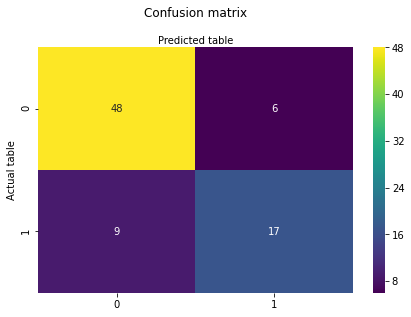

In [14]:
# visualizing confusion matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(y_predict))
plt.xticks(tick_marks, y_predict)
plt.yticks(tick_marks, y_predict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual table')
plt.xlabel('Predicted table')

In [15]:
# printing different scores
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))

Accuracy: 0.8125
Precision: 0.7391304347826086
Recall: 0.6538461538461539


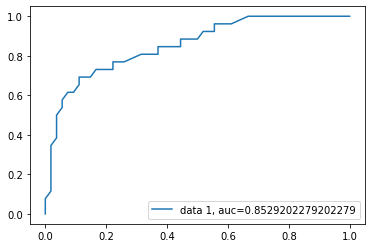

In [16]:
# plotting prediction graph
y_predict_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict_proba)
auc = metrics.roc_auc_score(y_test, y_predict_proba)
# Area under curve shows the accuracy
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()